#Dijkstra原理說明：

定義：
固定其中一個頂點作為源節點然後找到該頂點到圖中所有其它節點的最短路徑，產生一個最短路徑樹。

細節說明：
1.Dijkstra演算法的輸入包含了一個有權重的雙向圖 G，以及G中的一個來源頂點 S。
2.以 V 表示 G 中所有頂點的集合。
3.每一個圖中的邊，都是兩個頂點所形成的元素對。
4.(u, v) 表示從頂點 u 到 v 有路徑相連。
5.w(u, v) 表示從頂點 u 到頂點 v 的權重（weight），邊的權重可以想像成兩個頂點之間的距離。

資料來源：https://zh.wikipedia.org/wiki/戴克斯特拉算法

＃Dijkstra流程圖：

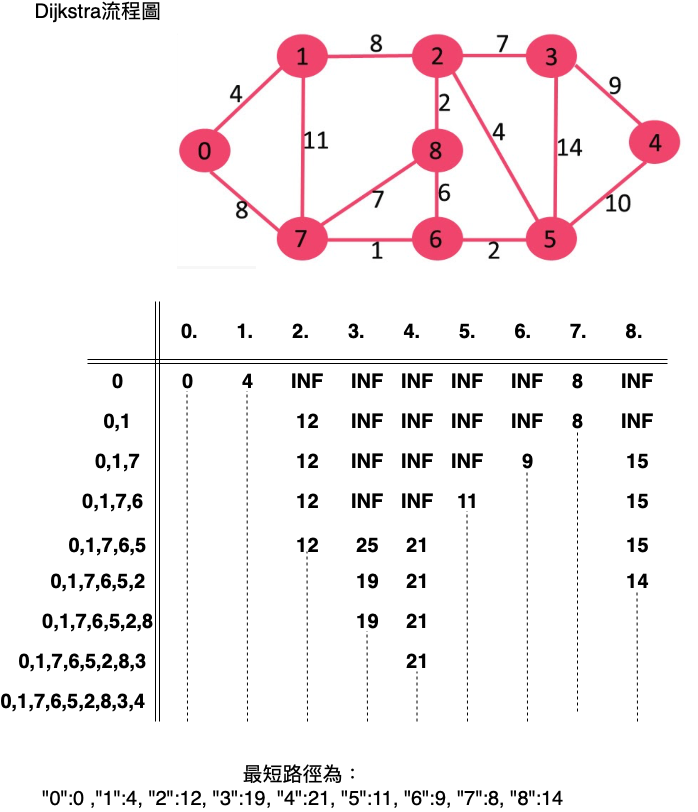

In [5]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/1:3ＨＷ/Dijkstra流程圖.png")

#圖片來源：https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

#如下圖中的頂點表示“城市”，而邊上的權重表示“城市間的距離”，Dijkstra可以用來找到兩個城市之間的最短路徑。

#Kruskal原理說明：

定義：
Kruskal為最小生成樹的其中一種演算法，而圖中若存在相同權重的邊也有效的。

細節說明：
1.將原圖中所有的邊按權重從小到大排序
2.從權重最小的邊開始搜尋，如果這條邊連接的兩個節點，不屬於同個根節點，則添加這條邊到圖G中
3.重複2.的步驟，直到n個點形成n-1個邊，即形成最小生成數

時間複雜度：
平均時間複雜度為O(|E|log|V|)，其中E和V分別是圖的邊集和點集

資料來源：https://zh.wikipedia.org/wiki/克鲁斯克尔演算法

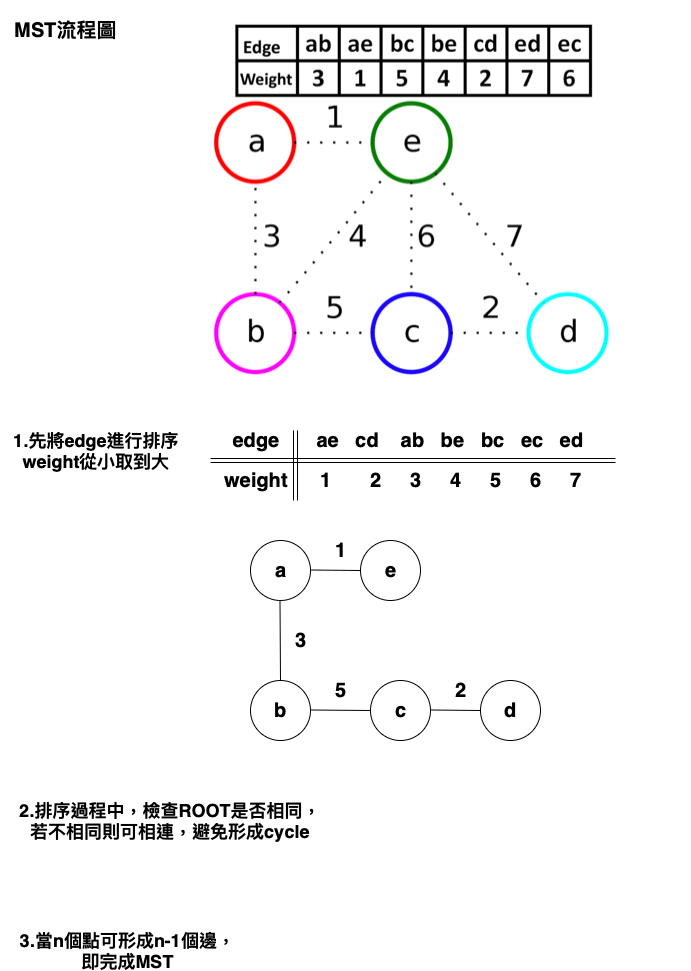

In [3]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/1:3ＨＷ/MST流程圖.png")

#圖片來源：https://zh.wikipedia.org/wiki/克鲁斯克尔演算法


#程式碼學習歷程

In [ ]:
# Python program for Dijkstra's single  
# source shortest path algorithm. The program is  
# for adjacency matrix representation of the graph 
# Python program for Kruskal's algorithm to find 
# Minimum Spanning Tree of a given connected,  
# undirected and weighted graph 

from collections import defaultdict 

#Class to represent a graph 
class Graph(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  #用來記錄每加入一個點權重更新的歷程
                    for row in range(vertices)] 
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
        self.graph.append([u,v,w]) #紀錄點u到點v，及u到v權重
        
    def Dijkstra(self, s):   #s為起點
        """
        :type s: int
        :rtype: dict
        """
        dist = dict()       #建立一個dict型式
        for i in range(self.V):   #將圖形中各點逐一取出(0~8)
            dist[i] = float("Inf") #先記錄各個點間的距離是無窮大
                                    #{0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6:inf, 7: inf, 8: inf}
        dist[s] = 0      #起點(s)到自己的距離為0
        
        Queue = [False] * self.V   #看幾個頂點就設幾個False
        
        for cnt in range(self.V): #cnt from 0~8
            u = self.ExtractMin(dist, Queue)
            Queue[u] = True
            for v in range(self.V): #relax
                if self.graph[u][v]>0: #adj[u] edge
                    if Queue[v] == False:
                        if dist[v] > dist[u] + self.graph[u][v]:
                            dist[v] = dist[u] + self.graph[u][v]
        return dist                    
        
    def ExtractMin(self, dist, Queue):
        Min = float("Inf")
        for v in range(self.V): # v from 0～8
            if dist[v] < Min and Queue[v] == False:
                Min = dist[v]
                min_index = v
        return min_index
        
    def Kruskal(self):
        """
        :rtype: dict
        """
        result = dict()
        e = 0
        self.graph.sort(key = lambda item:item[2])  #先將weight(位於第2個index)進行排序
        #x = sorted(self.graph, key=lamba item:item[2])
        parent = []      #紀錄子樹的parent是誰
        rank = []         #檢查目前子樹的樹高
        for node in range(self.V):   #node分別是0,1,2,3,4
            parent.append(node)    #第一次取的是node為0(2,3,4)
            rank.append(0)    #目前的樹高為0
        
        for u,v,w in self.graph:
            x = self.find(parent, u)   #
            y = self.find(parent, v)    
            
            if x!=y:    #如果x與y不相同，root不一樣
                e = e + 1
                result['%d%s%d' %(u,'-',v)] = w
                if e==self.V -1:
                    break
                self.union(parent, rank, x, y)   # x & y合併
        return result
        
    def find(self, parent, i):    #找到最上面的根節點
        if parent[i] != i:
            parent[i] = self.find(parent, parent[i])
        return parent[i]
        
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)    #若x與y要相接，須先找出x.root及y.root
        yroot = self.find(parent, y)
        
        if rank[xroot] < rank[yroot]:   #如果x的高度 < y的高度
            parent[xroot] = yroot        #則x併入y之中，且x的root改為y到root
        else:
            parent[yroot] = xroot
            if rank[xroot] == rank[yroot]:   #如果x,y高度一樣
                rank[xroot] += 1                 #y併入x中，且x的樹高+1
        

g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
                [4, 0, 8, 0, 0, 0, 0, 11, 0],
                [0, 8, 0, 7, 0, 4, 0, 0, 2],
                [0, 0, 7, 0, 9, 14, 0, 0, 0],
                [0, 0, 0, 9, 0, 10, 0, 0, 0],
                [0, 0, 4, 14, 10, 0, 2, 0, 0],
                [0, 0, 0, 0, 0, 2, 0, 1, 6],
                [8, 11, 0, 0, 0, 0, 1, 0, 7],
                [0, 0, 2, 0, 0, 0, 6, 7, 0],
                ]

print("Dijkstra:", g.Dijkstra(0))
        
g = Graph(4)
g.addEdge(0, 1, 10)
g.addEdge(0, 2, 6)
g.addEdge(0, 3, 5)
g.addEdge(1, 3, 15)
g.addEdge(2, 3, 4)

print("Kruskal", g.Kruskal())



#參考資料：https://www.youtube.com/watch?v=9wV1VxlfBlI
#參考資料：https://www.youtube.com/watch?v=mlVM9rhwbXg